### **Chapter 7: Extracting Image Features and Descriptors**

#### Giới thiệu 2 thuật toán Harris Corner Detector và  BRIEF
- Harris Corner Detector là một thuật toán phát hiện điểm góc trong ảnh. Thuật toán này dựa trên việc đo sự thay đổi trong cường độ ảnh khi di chuyển một cửa sổ nhỏ qua ảnh. Những điểm có sự thay đổi cường độ lớn trong mọi hướng được coi là các điểm góc.
- BRIEF (Binary Robust Independent Elementary Features) là một phương pháp để mô tả các điểm đặc trưng trong ảnh bằng cách sử dụng các đặc trưng nhị phân. BRIEF được sử dụng để làm mô tả ảnh trong các bài toán khớp ảnh, nhằm xác định các điểm đặc trưng trong ảnh và so sánh chúng một cách nhanh chóng và hiệu quả

---

#### 1. Harris Corner Detector With scikit-image

##### 1.1 Import các thư viện cần thiết

In [11]:
from matplotlib import pylab as pylab
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.feature import corner_harris

##### 1.2 Triển khai thuật toán Harris Corner Detector

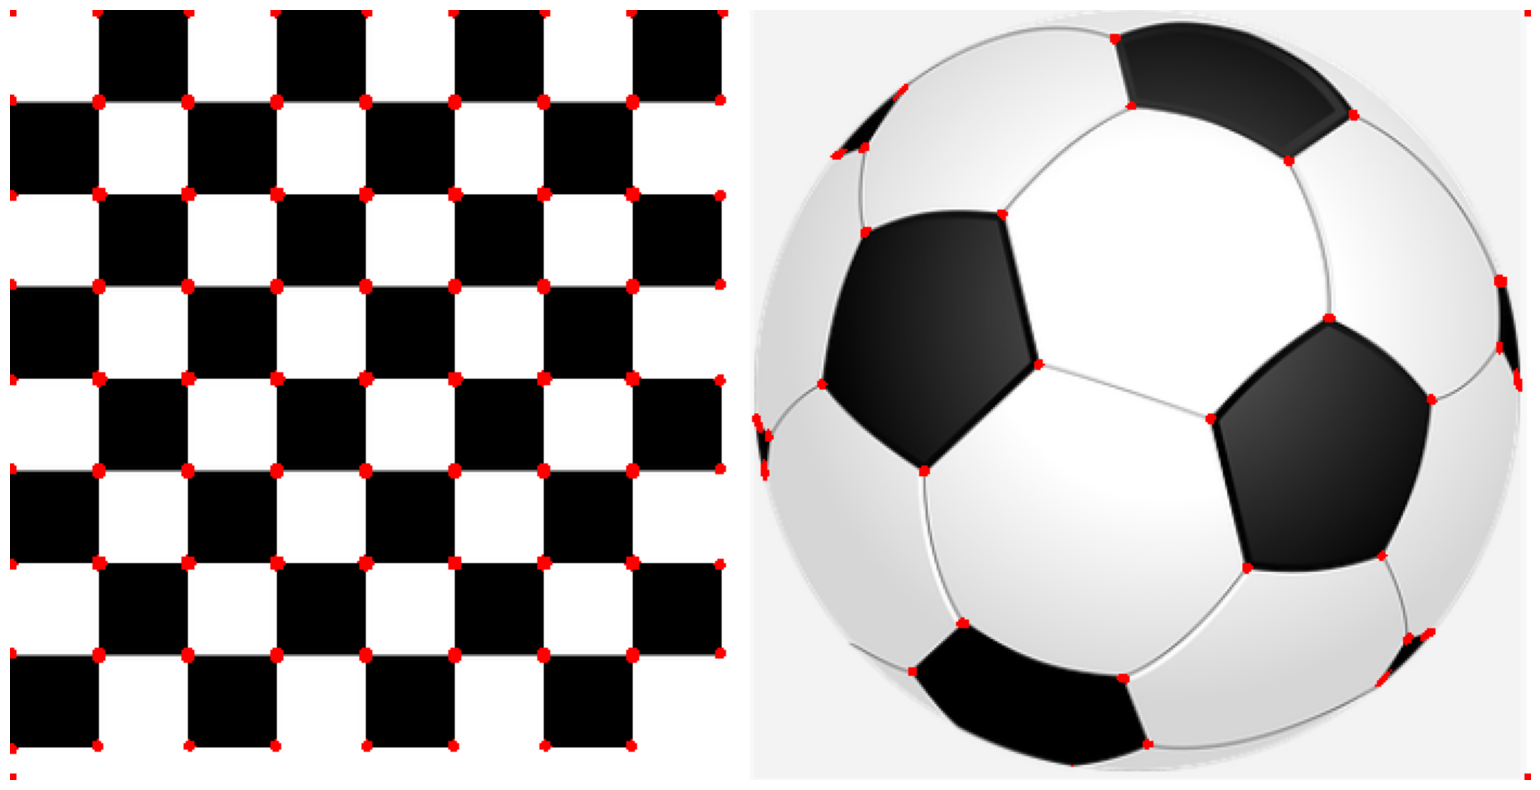

(<matplotlib.image.AxesImage at 0x23c9b18ebd0>,
 (-0.5, 700.5, 354.5, -0.5),
 None)

In [ ]:
# Đọc và xử lý ảnh đầu vào
image = imread('input/chess_football.png') # RGBA image
image_rgb = image[..., :3] # Chuyển đổi ảnh RGBA (4 kênh) về ảnh RGB (3 kênh)
image_gray = rgb2gray(image_rgb) # Chuyển thành ảnh xám

# Áp dụng thuật toán corner harris
coordinates = corner_harris(image_gray, k =0.001)
image[coordinates>0.01*coordinates.max()]=[255,0,0,255]

pylab.figure(figsize=(20,10))
pylab.imshow(image), pylab.axis('off'), pylab.show()

Thuật toán corner_harris xác định độ nhạy góc ở mỗi pixel trong ảnh. Giá trị càng cao biểu thị góc cạnh càng mạnh. coordinates là một ma trận giá trị cường độ cho mỗi điểm trong ảnh, với giá trị cao tại các điểm được nhận dạng là góc.
- corner_harris(image_gray, k=0.001): Áp dụng thuật toán phát hiện góc cạnh Harris trên ảnh xám image_gray.
    - k=0.001: Tham số k là hệ số nhạy cho thuật toán Harris. Giá trị thấp giúp phát hiện góc nhạy hơn nhưng cũng dễ gây nhiễu.
- pylab.figure(figsize=(20,10)): Tạo một figure với kích thước 20x10 inch để hiển thị ảnh.
- pylab.imshow(image): Hiển thị ảnh image với các góc cạnh đã được tô màu đỏ.
- pylab.axis('off'): Tắt hiển thị các trục của ảnh.
- pylab.show(): Hiển thị toàn bộ hình ảnh.


#### 2.  Matching images with BRIEF binary descriptors with scikit-image

##### 2.1 Import thêm các thư viện cần thiết

In [14]:
from skimage import transform as transform
from skimage.feature import (match_descriptors, corner_peaks, corner_harris, plot_matches, BRIEF)

##### 2.2 Triển khai thuật toán BRIEF

##### Đọc ảnh và xử lý đầu vào

In [ ]:
img1 = rgb2gray(imread('input/lena.jpg'))
affine_trans = transform.AffineTransform(scale=(1.2, 1.2), translation=(0,-100))
img2 = transform.warp(img1, affine_trans)
img3 = transform.rotate(img1, 25)

- Đọc ảnh gốc lena.jpg và chuyển sang dạng ảnh xám (grayscale) bằng rgb2gray().
- Tạo phép biến hình affine với tỉ lệ là 1.2 và dịch ảnh theo trục y (-100 pixels) lên ảnh gốc và tạo ra ảnh img2.
- Xoay ảnh gốc img1 thêm 25 độ để tạo ảnh img3.

#####  Phát hiện điểm góc Harris, lọc và xác định điểm góc mạnh

In [ ]:
# Áp dụng thuật toán Harris để phát hiện điểm góc trong cả 3 ảnh
coords1, coords2, coords3 = corner_harris(img1), corner_harris(img2), corner_harris(img3)
# Lọc và xác định điểm góc mạnh
coords1[coords1 > 0.01*coords1.max()] = 1
coords2[coords2 > 0.01*coords2.max()] = 1
coords3[coords3 > 0.01*coords3.max()] = 1
# Tìm kiếm các điểm góc quan trọng
keypoints1 = corner_peaks(coords1, min_distance=5)
keypoints2 = corner_peaks(coords2, min_distance=5)
keypoints3 = corner_peaks(coords3, min_distance=5)

- Sử dụng thuật toán Harris Corner Detector (corner_harris()) để phát hiện các điểm góc trong ba ảnh: ảnh gốc (img1), ảnh biến hình affine (img2), và ảnh xoay (img3).
- coords1[coords1 > 0.01*coords1.max()] = 1 :
    - Lọc ra các điểm góc có giá trị mạnh hơn 1% giá trị cực đại trong ma trận coords của từng ảnh.
    - Chuyển các giá trị lớn hơn ngưỡng này thành 1 (đại diện cho các điểm góc).
- keypoints1 = corner_peaks(coords1, min_distance=5) :
    - Sử dụng corner_peaks() để tìm các điểm góc trong ba ma trận coords. Hàm này giúp loại bỏ các điểm gần nhau (có khoảng cách nhỏ hơn min_distance=5 pixels) để chỉ giữ lại các điểm góc quan trọng.

##### Trích xuất BRIEF descriptors

In [ ]:
extractor = BRIEF() # Khởi tạo đối tượng BRIEF()

extractor.extract(img1, keypoints1)
keypoints1, descriptors1 = keypoints1[extractor.mask], extractor.descriptors
extractor.extract(img2, keypoints2)
keypoints2, descriptors2 = keypoints2[extractor.mask], extractor.descriptors
extractor.extract(img3, keypoints3)
keypoints3, descriptors3 = keypoints3[extractor.mask], extractor.descriptors

- Khởi tạo một đối tượng BRIEF() và sử dụng hàm extract() để trích xuất các đặc trưng nhị phân (descriptors) từ các điểm góc keypoints1 trong ảnh img1. descriptors1 chứa các đặc trưng nhị phân của các điểm góc, còn keypoints1 chứa các tọa độ của các điểm góc đó (sau khi áp dụng bộ lọc của BRIEF).
- Lặp lại quy trình trích xuất BRIEF cho ảnh img2 và img2 và lưu lần lượt các điểm góc và đặc trưng nhị phân vào keypoints2, descriptors2 và keypoints3, descriptor3.


##### Khớp các điểm đặc trưng giữa các ảnh

In [ ]:
matches12 = match_descriptors(descriptors1, descriptors2, cross_check=True)
matches13 = match_descriptors(descriptors1, descriptors3, cross_check=True)

- Dùng hàm match_descriptors() để khớp các đặc trưng giữa các cặp ảnh (img1 và img2, img1 và img3).
- cross_check=True là thuật toán sẽ chỉ khớp các điểm đặc trưng nếu cả hai chiều (từ img1 đến img2 và từ img2 đến img1) đều đồng ý là các đặc trưng này là tương ứng.

##### Hiển thị kết quả

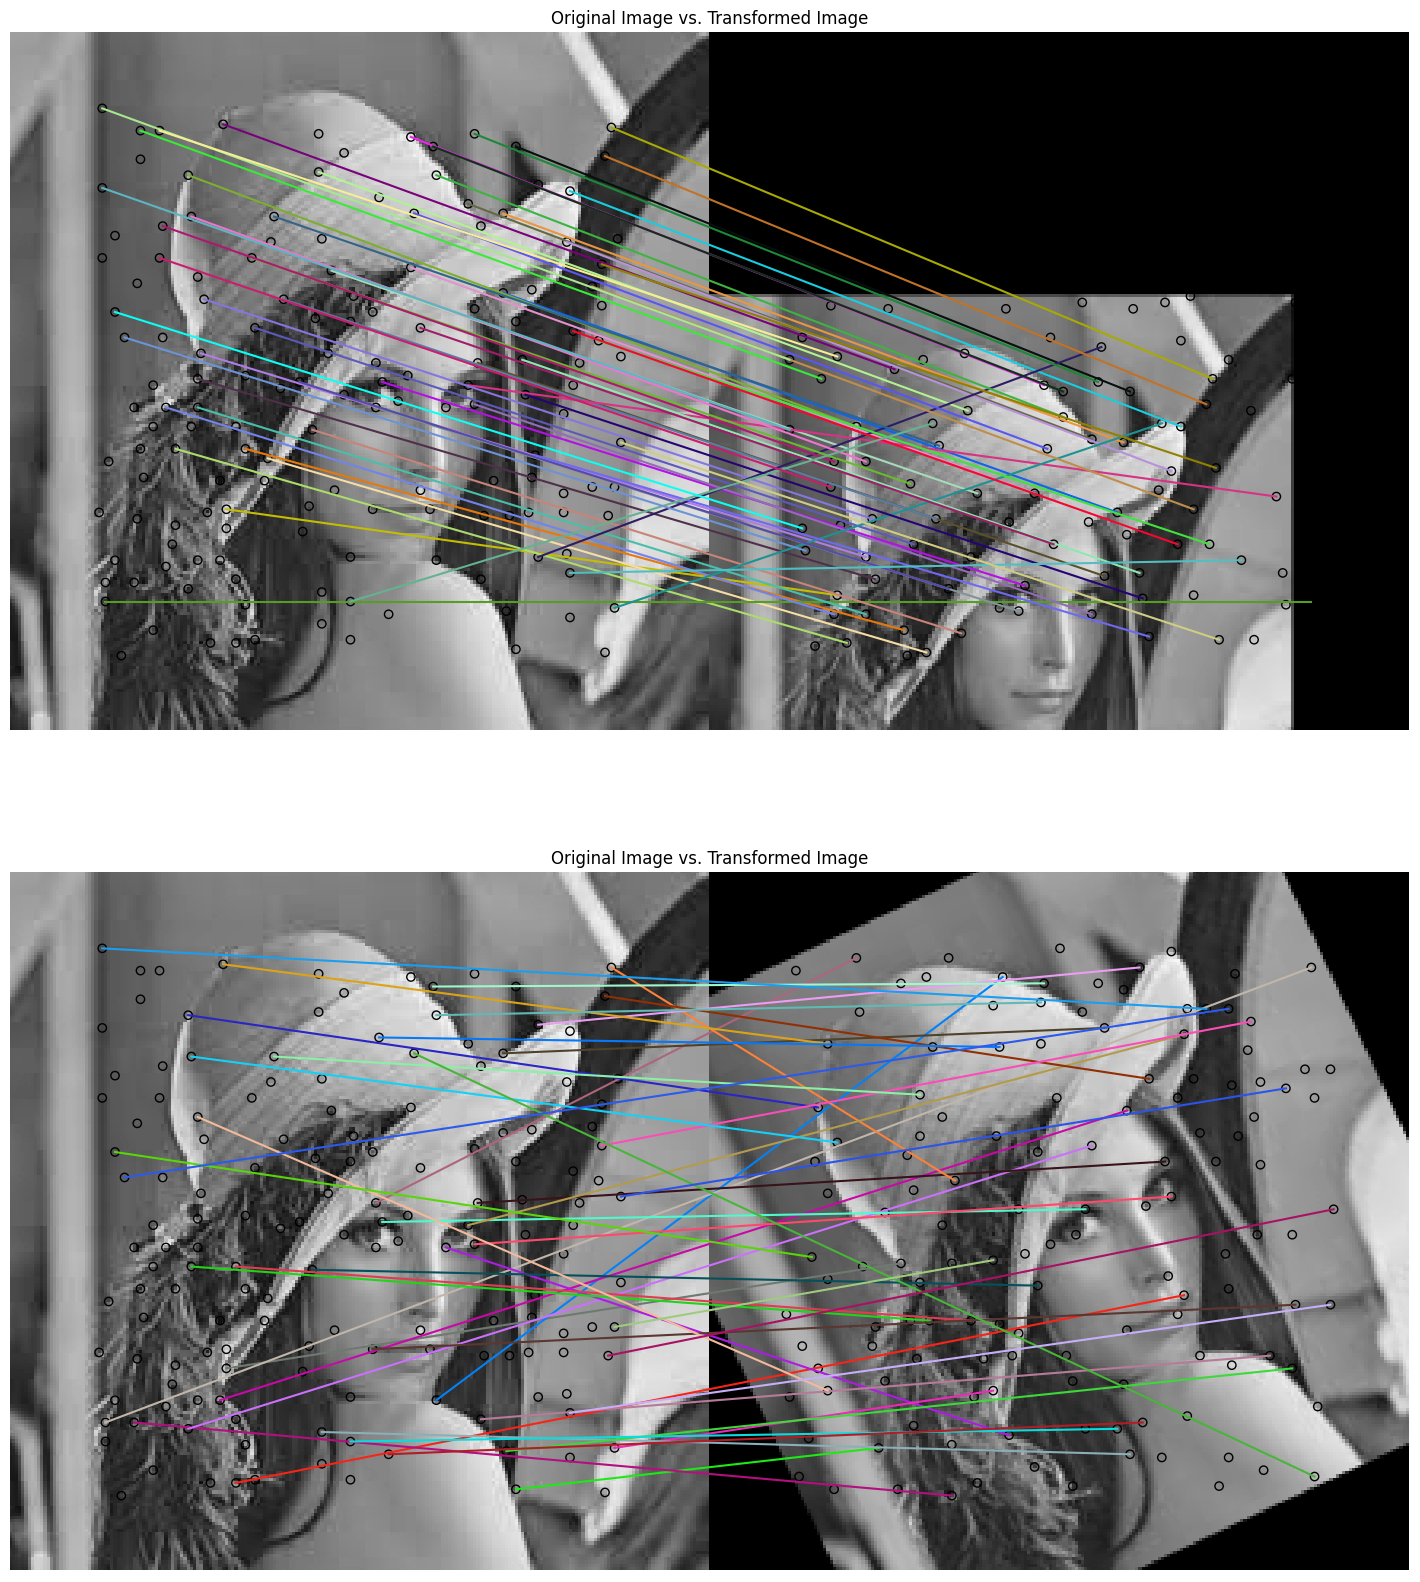

((0.0, 440.0, 220.0, 0.0),
 Text(0.5, 1.0, 'Original Image vs. Transformed Image'),
 None)

In [ ]:
fig, axes = pylab.subplots(nrows=2, ncols=1, figsize=(20,20)) # Vẽ một ảnh với 2 hàng và một cột, có kích thước 20 x 20 inches
# Vẽ ảnh img1 và img2 với các điểm đặc trưng và nối các điểm khớp
pylab.gray(), plot_matches(axes[0], img1, img2, keypoints1, keypoints2, matches12)
axes[0].axis('off'), axes[0].set_title("Original Image vs. Transformed Image")
# Tương tự vẽ ảnh img1 và img3
plot_matches(axes[1], img1, img3, keypoints1, keypoints3, matches13)
axes[1].axis('off'), axes[1].set_title("Original Image vs. Transformed Image"), pylab.show()